# Denoising autoencoder for sine wave

In [5]:
import torch
import torch.nn as nn

In [95]:
import torch
import torch.nn as nn

class SineModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(100, 50),
            nn.ReLU(True),
            nn.Linear(50, 10),
            nn.ReLU(True),
            nn.Linear(10, 2)
        )

        self.decoder = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(True),
            nn.Linear(10, 50),
            nn.ReLU(True),
            nn.Linear(50, 100)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        return self.decoder(encoded)


In [96]:
import numpy as np 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

def generate_random_sine(npoints=100, periods=1):
    points = np.arange(2*periods*np.pi, step=2*periods*np.pi/npoints) + np.random.rand()*2*periods*np.pi
    return torch.tensor(np.sin(points), dtype=torch.float32)

def add_noise(x, mu, stdev):
    return x + torch.tensor(np.random.normal(mu, stdev, x.shape), dtype=torch.float32)


class SineDataset(Dataset):

    def __init__(self, length, npoints=100):
        self.length = length
        self.npoints = npoints

    def __len__(self):
        return self.length
    
    def __getitem__(self, index):
        wave = generate_random_sine(self.npoints, periods=np.random.randint(1, 8))
        return wave

batch_size = 64
epochs = 1000
learning_rate = 0.01
loss_fn = nn.MSELoss()

data = SineDataset(length=1000, npoints=500)
dataloader = DataLoader(data, batch_size=batch_size)

model = SineModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

for epoch in range(epochs):
    loss_metric = 0
    for i, wave in enumerate(dataloader, 0):
        noisy_wave = add_noise(wave, 0, 0.3)

        optimizer.zero_grad()

        out = model(noisy_wave)
        loss = loss_fn(out, wave)
        loss_metric += loss.item()
        loss.backward()

        optimizer.step()
    if epoch % (epochs / 10) == 0:
        print(loss_metric/len(dataloader))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x500 and 100x50)

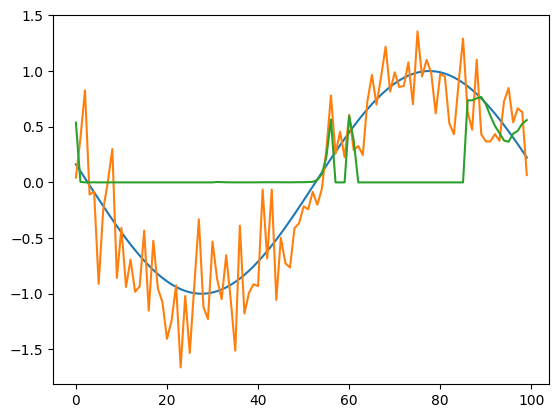

In [94]:
sine = generate_random_sine(100, periods=1)
noisy_sine = add_noise(sine, 0, 0.3)
out = model(noisy_sine)
import matplotlib.pyplot as plt
plt.plot(sine.numpy())
plt.plot(noisy_sine.numpy())
plt.plot(out.detach().numpy())